<a href="https://colab.research.google.com/github/jeanfcari/fast-nearest-neighbors/blob/master/Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Algorithm

X and Y must be two n length arrays.

In [0]:

# Since f: y -> |x-y| is a convex function applied on the non-decreasing sequence Y,
# the resulting image is also convex.
# Thus,it is possible to use binary search to find the minimal distance in O(log(n))
# without having to compute |x-y| for every y in Y.
def bottom(x, Y):
  
    start=time.time()
    
    lo, hi = 0, len(Y) - 1
    
    while lo < hi:
      
        mi = int((lo + hi) / 2)
        
        if diff(x,Y[mi]) >= diff(x,Y[mi + 1]): lo = mi + 1 
        else: hi = mi
          
    return diff(x,Y[lo]), time.time() - start

  
# Distance measure
def diff(x,y):
  return np.abs(x-y)


# Fast algorithm
def nearest_neighbor(X,Y):
  
  start = time.time()
  
  #Efficient sort in O(log(n))
  X_sort = sorted(X)
  Y_sort = sorted(Y)
  
  
  running_min = np.inf
  
  #Find closest point for each X, n times
  for i in range(len(X_sort)):  
    candidate_min, _ =  bottom(X_sort[i],Y_sort)
    if candidate_min<running_min: running_min=candidate_min
  
  return running_min, time.time()-start
    
      
# Trivial solution
def naive(X,Y):
  
    start = time.time()
    
    running_min = np.inf
    for i in range(len(X)):
      for j in range((len(Y))):
        candidate_min = diff(X[i],Y[j])
        if candidate_min<running_min: running_min=candidate_min
    
    return running_min, time.time()-start
 

# Test

In [0]:
naive_times=[]
fast_times=[]

naive_vals=[]
fast_vals=[]

for i in range(1,300):
  X , Y = np.random.uniform(size=i), np.random.uniform(size=i)
  naive_val, naive_time = naive(X,Y)
  fast_val , fast_time = nearest_neighbor(X,Y)
  
  naive_times.append(naive_time)
  fast_times.append(fast_time)
  
  naive_vals.append(naive_val)
  fast_vals.append(fast_val)

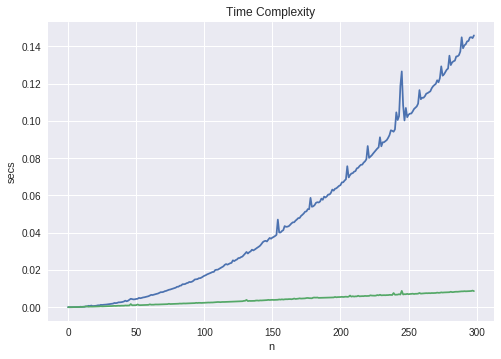

In [4]:
plt.plot(naive_times,label='Naive')
plt.plot(fast_times, label='Efficient')
plt.xlabel('n')
plt.ylabel('secs')
plt.title('Time Complexity')
plt.show()

In [5]:
sum(naive_vals)==sum(fast_vals)

True